# Differential Algebraic Equation / Partial Differentiation Equation solvers
_By Dhruv Jain_

### **Objective: Implementation of fintie differentiation to solve various types of PDE**

In [1]:
# Key libraries: Numpy(for mathematical procedures) and matplotlib(to create plots)
import numpy as np
import matplotlib.pyplot as plt 
import copy

## 1D Heat Equation
$\frac{\partial h}{\partial t} = k\frac{\partial^2 h}{\partial x^2}$; $0 \leq t < \infty $, $0 \leq x \leq X_{limit}$<br>
$h(0,t) = 0$<br>
$h(X_{limit},t) = f(t)$ <br>
$h(x,0) = 0$

We notice that the DE is a PDE with derivatives with respect to t and x. <br>
We discretize $x$ as $x_i$ where i = 0, 1, ....., $n_x$, $\Delta x = \frac{X_{limit} - 0}{n_x}$<br>
$t$ as $t_k$ where k = 0,1,...., $n_t$, $\Delta t = \frac{max(t) - 0}{n_t}$<br>
Using Finite Forward Differencing of first-order and Central Differencing of second-order accuracy, we approximate the derivative terms as, <br>
(This setup is first-order accurate in time and second-order accurate in space)<br>

\begin{equation}
   \frac{\partial h}{\partial t} \approx \frac{h_{i}^{k+1}-h_{i}^{k}}{\Delta t} \notag{}
\end{equation}

\begin{equation}
   \frac{\partial^2 h}{\partial x^2} \approx \frac{h_{i+1}^k-2h_i^k+h_{i-1}^k}{\Delta x^2} \notag{}
\end{equation}

where, $h(x_i, t_k) = h_i^k$
Subsituting and discretizing the other pieces in the given PDE, 

\begin{equation}
    \frac{h_{i}^{k+1}-h_{i}^{k}}{\Delta t} = k\frac{h_{i+1}^k-2h_i^k+h_{i-1}^k}{\Delta x^2} \notag{}
\end{equation}

Rearranging the terms, we get the discretized PDE:


\begin{equation}
    h_{i}^{k+1} = h_{i}^{k} + k\frac{\Delta t}{\Delta x^2}(h_{i+1}^k-2h_i^k+h_{i-1}^k) \notag{}
\end{equation}

With B.C.: <br>
$h_0^k = 0$<br>
$h_{X_{limit}}^t = f_k(t)$ <br>
$h_i^0 = 0$

In [2]:
def PDE_solve_1Dheat(tmax, xmax, hx, ht, bc0t, funcx, kconst):
    """"Dhruv Jain, 22 Nov 2021
    Obj: Solve 1D heat equation of the from 
        h_t = k*h_xx; t ->[0,tmax), x -> [a,b]
        h(a,t) = bc0t
        h(x,0) = funcx
        dh/dx(b,t) = 0
    Args:
        tmax: end value of time interval, float
        xmax: end value of space interval, float
        hx: step size in space, float
        ht: step size in time, float
        bc0t: condition 1, Dirichlet condition, float
        funct: function that defines h(x,0)
        kconst: constant, float
    Output:
        soln: dict, evaluated y values ['y'] and respective time steps ['t'], ndarray
    """
    
    xi = np.arange(0, xmax+1e-15, hx)    # mesh points in space
    ti = np.arange(0, tmax+1e-12,ht)     # time discretization
    Nx = len(xi)-1
    Nt = len(ti)-1
    
    D = kconst*ht/hx**2
    
    yi = np.zeros((Nt+1, Nx+1))
    
    yi[0,:] = funcx(xi) #h(x,0), B.C. bottom
    yi[:,0] = bc0t*np.ones(Nt+1) #h(0,t), B.C. left
    
    for k in range(1,Nt):
        for i in range(1,Nx+1):
            if i == Nx:
                yi[k,i] = yi[k-1,i] + D*(- 2*yi[k-1,i] + 2*yi[k-1,i-1]) #  Neuman Condition on B.C. right
            else:   
                yi[k,i] = yi[k-1,i] + D*(yi[k-1,i+1] - 2*yi[k-1,i] + yi[k-1,i-1]) # Basic Setup for 1D Heat Equation        
    
    fval = {}
    fval['y'] = yi # y(x,t)
    fval['x'] = xi
    fval['t'] = ti
    
    return fval

# #Example 1
$\frac{\partial T}{\partial t} = c\frac{\partial^2 T}{\partial x^2}$; $0 < x < 4 m$<br>
$T(0,t) = 273$<br>
$T_x(4,t) = 0$ <br>
$T(x,0) = 273 + 25sin(3x)$

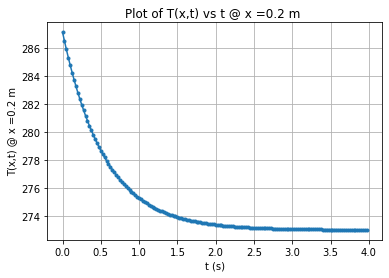

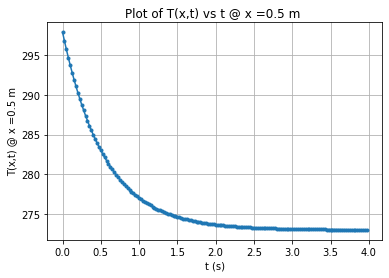

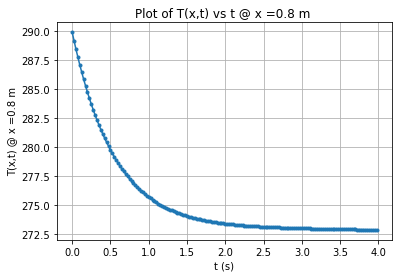

In [3]:
def p1_bcx0(xi):
    """"Dhruv Jain, 11 Dec, 2021
    Obj: h(xi,0) expression for 1D Heat Equation
    Args:
        xi: xi's, ndarray, float
    Output:
        hi: ndarray
    """
    hi = 273 + 25*np.sin(3*xi)
    return hi

tmax = 31
xmax = 4
delta_x = 0.1 
delta_t = 0.025
kconst = 1/5
bc0t = 273

fval_p1 = PDE_solve_1Dheat(tmax, xmax,delta_x, delta_t, bc0t, p1_bcx0, kconst)

# Find index of array for the required x values
xneeded = [0.2, 0.5 ,0.8]
xindex = []
tlim = []
for i in range(len(xneeded)):
        xindex.append(np.argmin(abs(fval_p1['x']-xneeded[i])))

# T(x,t) computed till 31 sec, get index for t till 4 sec
tlim = np.argmin(abs(fval_p1['t']-4))

for i in range(len(xindex)):
    plt.figure(i)
    plt.title('Plot of T(x,t) vs t @ x ='+str(xneeded[i])+' m ')
    plt.plot(fval_p1['t'][:tlim], fval_p1['y'][:tlim,xindex[i]],marker='.')
    plt.ylabel('T(x,t) @ x ='+str(xneeded[i])+' m')
    plt.xlabel('t (s)')
    plt.grid()

## Advect Equation
Finite Forward Differnce Method <br>
$c\frac{\partial u}{\partial t} + k\frac{\partial u}{\partial x} = qx$, $u(x,0) = sin(2\pi x/L)$, u(0,t) = 0<br>

Discretized PDE using first-order accuracy finite forward differencing method in time and backward differencing method in space: 

\begin{equation}
    c\frac{u_{i}^{k+1}-u_{i}^{k}}{\Delta t} + k\frac{u_{i}^{k}-u_{i-1}^{k}}{\Delta x}  = qx_i \notag{}
\end{equation}

where, $u(x_i, t_k) = u_i^k$<br>
$u(x_i,0) = sin(2\pi x_i/L)$ <br>
$u(0,t_k) = 0$<br>


\begin{equation}
    u_{i}^{k+1} = u_{i}^{k} - \frac{k\Delta t}{c\Delta x}(u_{i}^{k}-u_{i-1}^{k}) + \frac{qx_i\Delta t}{c} \notag{}
\end{equation}

In [4]:
def advect_solve_forwdiff_dir_dir(del_x, del_t, kconst, q, L, xmax, tmax):
    """"Dhruv Jain, 22 Nov, 2021
    Obj: Uses Finite Forward Difference Method of first-order accuracy in time and Backward Difference Method in space to solve BVP
        of Advect form: du/dt + kdu/dx = r
        Dirichlet BC left and bottom
    Args:
        del_x: spatial discrization, float
        del_t: temporal discretization, float
        k: coeffeicient of du/dx, float
        q: coefficient on rhs, float
        L: constant in B.C., float
        xmax: U.L. of x, float
        tmax: U.L. of t, float
    Output:
        soln: dict, evaluated y values ['y'] and respective time steps ['t'], ndarray
    """
    xi = np.arange(0,xmax+1e-12,del_x)
    ti = np.arange(0,tmax+1e-12,del_t)
        
    y = np.zeros((len(ti),len(xi))) # B.C. left = 0
    
    y[0,:] = np.sin(2*np.pi*xi/L) # Set B.C. bottom

    lam = kconst/5*del_t/del_x
    grhs = del_t*q*xi/5
    for k in range(1,len(ti)):       
        for i in range(1,len(xi)):
            y[k,i] = (1-lam)*y[k-1,i] + lam*y[k-1,i-1] + grhs[i]
            
    fval = {}
    fval['y'] = y
    fval['t'] = ti
    fval['xi'] = xi
    return fval

# #Example 2

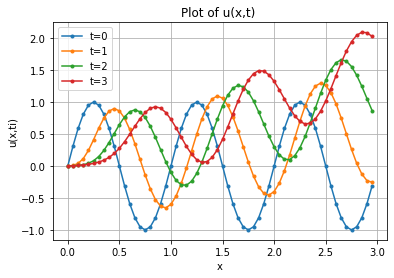

In [5]:
delta_x = 0.05
delta_t = 0.005
k = 1 #m/s
q = 1 #1/m
L = 1 #m
xmax = 3 #m
tmax = 3 #sec

sol_p1 = advect_solve_forwdiff_dir_dir(delta_x, delta_t, k, q, L, xmax, tmax)

xindex = np.argmin(abs(sol_p1['xi']-3))

index = []
for i in range(4):
    index.append(np.argmin(abs(sol_p1['t']-i)))
    
plt.figure(1)
plt.title('Plot of u(x,t) ')
for i in range(0,len(index)):
    plt.plot(sol_p1['xi'][:-1],sol_p1['y'][index[i],:xindex],marker='.',label='t='+str(i))
plt.xlabel('x')
plt.ylabel('u(x,ti)')
plt.grid()
plt.legend()

## Wave Equation
$\frac{\partial^2 u}{\partial t^2} = c^2\frac{\partial^2 u}{\partial x^2}$<br>
$u(0,t) = u(l,t) = 0$<br>
$u_t(x,0) = g(x)$<br>
$u(x,0) = f(x)$

In [6]:
def wave_solve_dir_neu(c, m, l, tsteps, xsteps, tmax, funcf, funcg):
    """"Dhruv Jain, 7 Dec, 2021
    Obj: Uses Finite Central Difference Method of second-order accuracy to solve BVP
        of wave form: d^2u/dt^2  = c^2 d^2u/dx^2
        Dirichlet BC
    Args:
        c: coeffeicient of d^2u/dx^2, float
        m: constant in B.C., float
        L: constant in B.C. and U.L. of x, float
        tsetps: number of time steps, int
        xsteps: number of spatial steps, int
        tmax: U.L. of t, float
        funcf: function to compute f(x) for u(x,0)
        funcg: function to compute g(x) for u_t(x,0)
    Output:
        soln: dict, evaluated y values ['y'] and respective time steps ['t'], ndarray
    """
    xi = np.linspace(0,l,xsteps+1)
    del_x = xi[1]-xi[0]
    ti = np.linspace(0,tmax,tsteps+1)
    del_t = ti[1]-ti[0]
        
    D = (c*del_t/del_x)**2
    
    y = np.zeros((len(ti),len(xi)))
    # B.C. left and right: u(0,ti) = u(l,ti) = 0
    
    y[0,:] = funcf(xi, l)
    
    gi = funcg(xi)
    
    # As u_t(x,0) is known
    for i in range(1,len(xi)-1):
        y[1,i] = y[0,i] + del_t*gi[i] + 1/2 * D*(y[0,i+1] - 2*y[0,i] + y[0,i-1])
        
    #Using u(0,i) and u(1,i) compute u(k,i) for k>1 and i lies between 1 and xi-1
    for k in range(1,len(ti)-1):       
        for i in range(1,len(xi)-1):
            y[k+1,i] = 2*y[k,i] - y[k-1,i] + D*(y[k,i+1] - 2*y[k,i] + y[k,i-1])
            
    fval = {}
    fval['y'] = y
    fval['t'] = ti
    fval['xi'] = xi
    return fval

# #Example 3

In [7]:
def p2_g(xi):
    """"Dhruv Jain, 6 Dec
    Obj: g(x) expression 
    Args:
        xi: xi's, ndarray, float
    Output:
        gi: g(xi), ndarray
    """
    gi = xi*0
    return gi

def p2_f(xi, l):
    """"Dhruv Jain, 6 Dec
    Obj: f(x) expression 
    Args:
        xi: xi's, ndarray, float
    Output:
        fi: f(xi), ndarray
    """
    
    fi = np.zeros((len(xi)))

    #Compute B.C. bottom: u(xi,0)
    for i in range(len(xi)):
        if xi[i] <= l/2 and xi[i] >= 0: 
            fi[i] = 2*m*xi[i]/l
        elif xi[i] <= l and xi[i] > l/2: 
            fi[i] = 2*m*(l-xi[i])/l

    return fi

tmax = 10
tsteps = 500
xsteps = 500
l = 10
c = 1
m = 1
sol_p2 = wave_solve_dir_neu(c, m, l, tsteps, xsteps, tmax, p2_f, p2_g)

t_req = [0, 2.5, 5, 7.5, 10]
index = []
for i in t_req:
    index.append(np.argmin(abs(sol_p2['t']-i)))


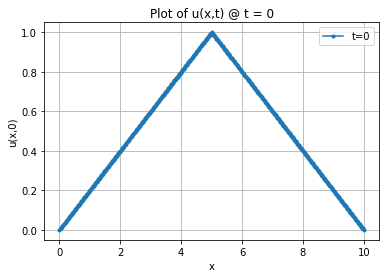

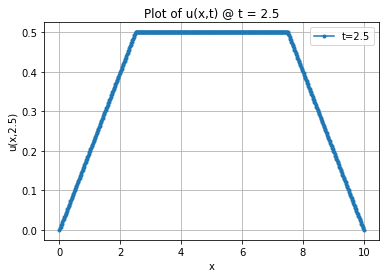

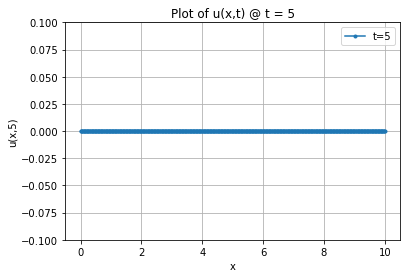

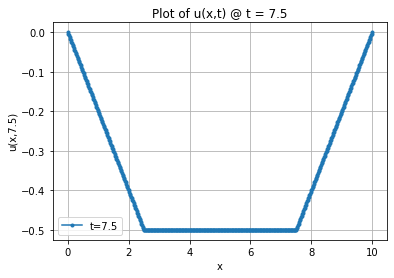

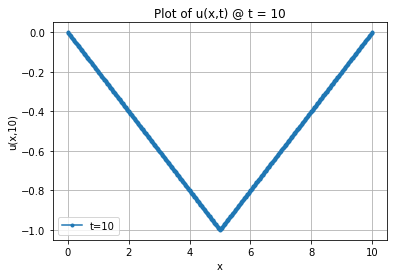

In [8]:
for i in range(len(index)):
    plt.figure(i)
    plt.title('Plot of u(x,t) @ t = '+str(t_req[i]))
    plt.plot(sol_p2['xi'], sol_p2['y'][index[i],:],marker='.',label='t='+str(t_req[i]))
    plt.ylabel('u(x,'+str(t_req[i])+')')
    plt.xlabel('x')
    if max(abs(sol_p2['y'][index[i],:])) < 1e-12: # To avoid plotting near machine precision values of u(x,y)
        plt.ylim([-0.1, 0.1])
    plt.grid()
    plt.legend()

## Laplace Equation

In [9]:
def laplace_solve_neumleft_neubottom(h,xmin,xmax, ymin, ymax, funcf, funcg):
    """"Dhruv Jain, 12 Dec
    Obj: Uses Finite Central Difference Method of second-order accuracy to solve BVP
        of laplace form: d^2u/dy^2  + d^2u/dx^2 = f(x,y)
        Dirichlet BC on top and right = g(x,y)
        Neuman BC on left(=0) and bottom(=0)
    Args:
        h: step size, dx=dy=h, float
        xmin: L.L. of x, float
        xmax: U.L. of x, float
        ymin: L.L. of y, float
        ymax: U.L. of y, float
        funcf: function to compute f(x,y) for u(x,y)
        funcg: function to compute g(x,y) for u(x,y) # B.C. top and right
    Output:
        soln: dict, ndarray
        {u: u(x,y) values
        xi: xi values
        yi: yi values}
    """
    xi = np.arange(xmin,xmax+1e-12,h)
    yi = np.arange(ymin,ymax+1e-12,h)
    
    u = np.zeros((len(yi),len(xi)))
    B = np.zeros((len(yi)-1,len(xi)-1))# B should not contain nodes on top and right

    u[0,-1] = funcg(-1,0,xi[-1],yi[0]) #u_0,-1
    for i in range(len(yi)-1):
        B[i,-1] = funcg(-1,i,xi[-1],yi[i]) # Add B.C. right to all u_-1,i
     
        u[i+1,-1] = funcg(-1,i+1,xi[-1],yi[i+1]) #u_-1,-1
    
    u[-1,0] += funcg(0,-1,xi[0],yi[-1])#u_-1,0
    for i in range(len(xi)-1):          
        B[-1,i] = funcg(i,-1,xi[i],yi[-1]) # Add B.C. top to all u_i,-1
        u[-1,i+1] += funcg(i+1,-1,xi[i+1],yi[-1]) #u_-1,1 -> u_-1,-1
    
    for i in range(len(yi)-1):
        for j in range(len(xi)-1):
            B[i,j] += -h**2*funcf(xi[i],yi[j]) # Add -h^2*fij terms
            
    B = B.flatten()
    A = np.zeros((len(B),len(B)))  
    
    D = np.zeros((len(xi)-1,len(xi)-1))
    
    for i in range(len(xi)-1): # Only difference in D from typical Dirichlet setup is -2 on D[1,1] instead of -1 to account for Neumann on left
        D[i,i] = 4
        for j in range(len(xi)-1):
            if j == i+1:
                D[i,j] = -1
                if i == 0:
                    D[i,j] = -1*2
            if j == i-1:
                D[i,j] = -1

    nx = len(xi)-1
    for i in range(len(yi)-1): # Sim
        A[nx*i:nx*(i+1),nx*i:nx*(i+1)] = D
        for j in range(len(yi)-1):
            if j == i+1 and j == 1:
                A[nx*i:nx*(i+1),nx*j:nx*(j+1)] = -2*np.identity(nx) # -2*I to account for Neumann on bottom 
            if j == i+1 and j > 1:
                A[nx*i:nx*(i+1),nx*j:nx*(j+1)] = -np.identity(nx)
            if j == i-1:
                A[nx*i:nx*(i+1),nx*j:nx*(j+1)] = -np.identity(nx)
    
    uij = np.matmul(np.linalg.inv(A),B)

    for i in range(len(yi)-1):
        u[i,0:len(xi)-1] = uij[nx*i:nx*(i+1)]
    
    fval = {}
    fval['u'] = u
    fval['yi'] = yi
    fval['xi'] = xi
    return fval

# #Example 4
dT/dx(-10,y) = 0, dT/dy(x,-10) = 0, T(x,10) = 0, T(10,y) = 0

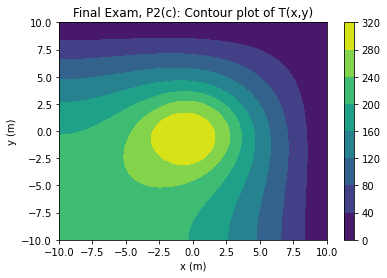

In [10]:
def p2_f(xi,yj):
    """"Dhruv Jain, 11 Dec, 2021
    Obj: f(x,y) expression
    Args:
        xi: x value at i, float
        yj: y value at j, float
    Output:
        fi: f(i,j), float
    """
    if xi**2 + yj**2 <= 10:
        fij = -25 
    else:
        fij = 0
    return fij

def p2_g_c(i,j,xi,yj):
    """"Dhruv Jain, 11 Dec, 2021
    Obj: g(x,y) expression
    Args:
        i: x index, int
        j: y index, int
        xi: x value at i, float
        yj: y value at j, float
    Output:
        gi: g(i,j), float
    """   
    if i == -1 and j != -1: # Right BC
        gi = 0
    elif j == -1:# Top BC
        gi = 0
    return gi

# Setup
h = 0.5
xmin = -10
xmax = 10
ymin = -10
ymax = 10
sol_p2c = laplace_solve_neumleft_neubottom(h,xmin,xmax, ymin, ymax, p2_f, p2_g_c)

# Pot
xindex = np.argmin(abs(sol_p2c['xi']-0))
yindex = np.argmin(abs(sol_p2c['yi']-0))

# Contour Plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(sol_p2c['xi'],sol_p2c['yi'],sol_p2c['u'])
fig.colorbar(cp) 
ax.set_title('Final Exam, P2(c): Contour plot of T(x,y)')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.show()
